Total Impressions: 1000
Total Clicks: 74
Clicks for Top Banner: 10.0
Clicks for Sidebar: 62.0
Clicks for Footer: 1.0
Clicks for Pop-up: 1.0


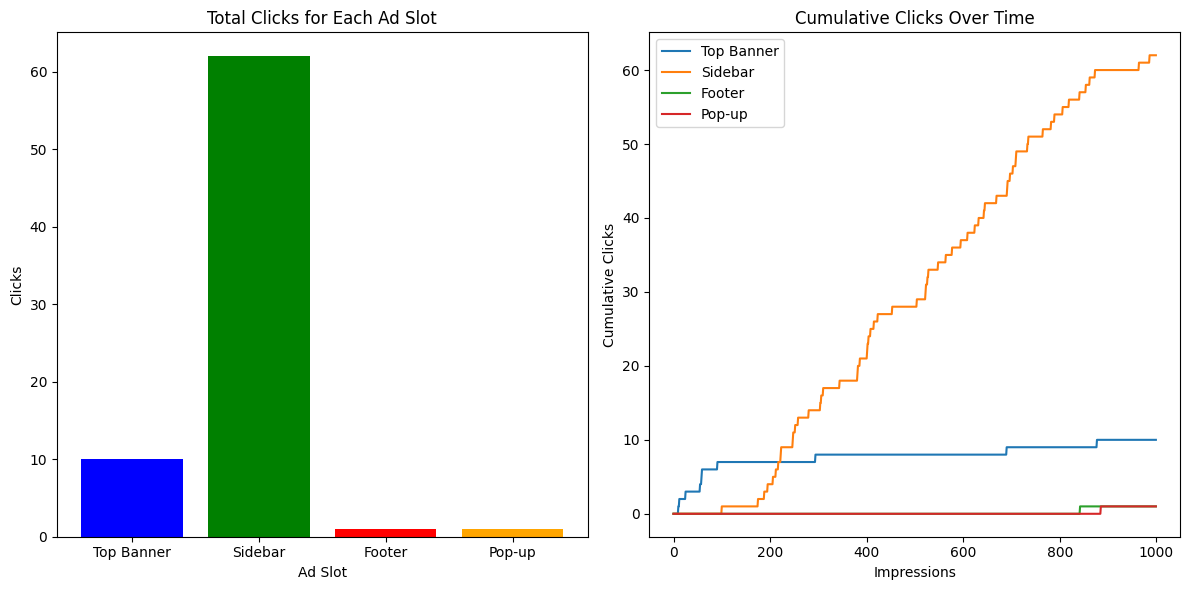

In [9]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Epsilon-Greedy Multi-Armed Bandit class
class EpsilonGreedyBandit:
    def __init__(self, n_arms, epsilon):
        self.n_arms = n_arms                    # Number of arms (ad slots)
        self.epsilon = epsilon                  # Exploration rate
        self.arm_counts = np.zeros(n_arms)      # Number of times each arm was pulled
        self.arm_rewards = np.zeros(n_arms)     # Cumulative rewards for each arm

    def select_arm(self):
        # Epsilon-Greedy strategy for selecting an arm (ad slot)
        if random.random() < self.epsilon:      # Exploration
            return random.randint(0, self.n_arms - 1)
        else:                                   # Exploitation
            return np.argmax(self.arm_rewards / (self.arm_counts + 1e-5))  # Avoid division by zero

    def update(self, arm, reward):
        # Update the counts and rewards for the selected arm based on feedback
        self.arm_counts[arm] += 1
        self.arm_rewards[arm] += reward

# Simulating the environment (CTR for each ad slot)
def simulate_ad_environment(true_ctr, n_impressions):
    rewards = []
    for _ in range(n_impressions):
        reward = np.random.binomial(1, true_ctr)  # Simulate a click (1) or no click (0) based on true CTR
        rewards.append(reward)
    return rewards

# Run the Multi-Armed Bandit simulation
def run_simulation(n_impressions, epsilon):
    # True click-through rates (CTR) for each ad slot (unknown to the algorithm)
    true_ctr = [0.05, 0.07, 0.02, 0.1]  # Top banner, sidebar, footer, pop-up
    n_arms = len(true_ctr)

    # Initialize the epsilon-greedy bandit
    bandit = EpsilonGreedyBandit(n_arms, epsilon)

    # Variables to track results
    total_clicks = 0
    clicks_per_slot = np.zeros(n_arms)
    cumulative_clicks = np.zeros((n_impressions, n_arms))  # To store cumulative clicks over time

    # Simulate the ad impressions
    for i in range(n_impressions):
        # Select an ad slot (arm)
        selected_arm = bandit.select_arm()

        # Simulate the outcome of showing the ad in the selected slot
        reward = simulate_ad_environment(true_ctr[selected_arm], 1)[0]

        # Update the bandit with the observed reward
        bandit.update(selected_arm, reward)

        # Track total clicks and clicks per slot
        total_clicks += reward
        clicks_per_slot[selected_arm] += reward

        # Store cumulative clicks over time
        cumulative_clicks[i] = clicks_per_slot.copy()

    # Print out results
    print(f"Total Impressions: {n_impressions}")
    print(f"Total Clicks: {total_clicks}")
    for i, slot in enumerate(["Top Banner", "Sidebar", "Footer", "Pop-up"]):
        print(f"Clicks for {slot}: {clicks_per_slot[i]}")

    # Plot the results
    plot_results(n_impressions, clicks_per_slot, cumulative_clicks)

    return bandit

# Plotting function for results
def plot_results(n_impressions, clicks_per_slot, cumulative_clicks):
    slots = ["Top Banner", "Sidebar", "Footer", "Pop-up"]

    # Plot 1: Total clicks for each ad slot
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(slots, clicks_per_slot, color=['blue', 'green', 'red', 'orange'])
    plt.title('Total Clicks for Each Ad Slot')
    plt.ylabel('Clicks')
    plt.xlabel('Ad Slot')

    # Plot 2: Cumulative clicks over time for each ad slot
    plt.subplot(1, 2, 2)
    for i in range(len(slots)):
        plt.plot(cumulative_clicks[:, i], label=slots[i])
    plt.title('Cumulative Clicks Over Time')
    plt.xlabel('Impressions')
    plt.ylabel('Cumulative Clicks')
    plt.legend()

    # Show the plots
    plt.tight_layout()
    plt.show()

# Test the implementation with 1000 ad impressions
n_impressions = 1000
epsilon = 0.1  # 10% exploration rate

bandit_model = run_simulation(n_impressions, epsilon)
